**Question 1**
**Given an ECG signal “original_ECG.mat”, compute its DFT. (Sampling frequency
of the signal is 1000 Hz.)
(a) Plot its magnitude and phase spectrum.
(b) Find out the magnitude in dB and phase angle in degrees at frequency 30 Hz.
Display the values.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [2]:
import scipy.io
mat = scipy.io.loadmat('original_ECG.mat')

In [3]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 13 11:22:04 2015',
 '__version__': '1.0',
 '__globals__': [],
 'original': array([[39.60475775, 40.07076881, 40.5922544 , ..., 54.22427311,
         58.8477386 , 62.91896577]])}

In [4]:
signal = mat['original'][0]

In [5]:
signal
print(len(signal))

10000


In [6]:
def DFT(signal,N):
  if(len(signal) < N):
    signal.append(0)
  dft = []
  for k in range(N):
    sum = 0
    for n in range(len(signal)):
      expo_power = ((-1)*2*np.pi*k*n)/N
      expo = complex(0,expo_power)
      sum = sum + signal[n] * cmath.exp(expo)
    dft.append(sum)
  return dft

In [7]:
# def DFT(x,N):
#   dft = []
#   if(len(x)<N):
#     for i in range(N-len(x)):
#       x.append(0)
#   for k in range(N):
#     p = 0
#     for n in range(N):
#       r = (-1)*2*np.pi*k*n/N
# # print(r)
#       t = complex(0,r)
#       p = p + x[n] * cmath.exp(t)
#     dft.append(p)

In [8]:
# DFT(signal,len(signal))

In [9]:
dft = np.fft.fft(signal,len(signal))
dft

array([1051051.42082599    +0.j        ,   12232.69647406 -4801.70190819j,
         12362.15439958-10218.08945944j, ...,
         12620.69947601+17149.44369972j,   12362.15439958+10218.08945944j,
         12232.69647406 +4801.70190819j])

In [10]:
k = np.arange(len(signal))
# print(k)
freq = []
Fs = 1000
N = len(signal)
for i in range(len(k)):
  w = (k[i]*Fs)/N
  freq.append(w)
# max(freq)

In [11]:
mag = [np.sqrt((ele.real)**2 + (ele.imag)**2) for ele in dft]

10000

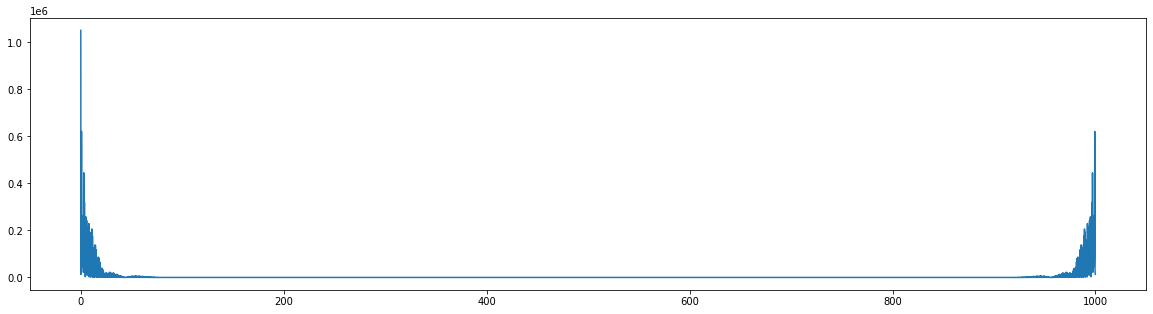

In [12]:
plt.figure(figsize = (20,5))
plt.plot(freq,mag)
len(freq)

In [13]:
phase = [(np.arctan(ele.imag/ele.real)*180)/np.pi for ele in dft]

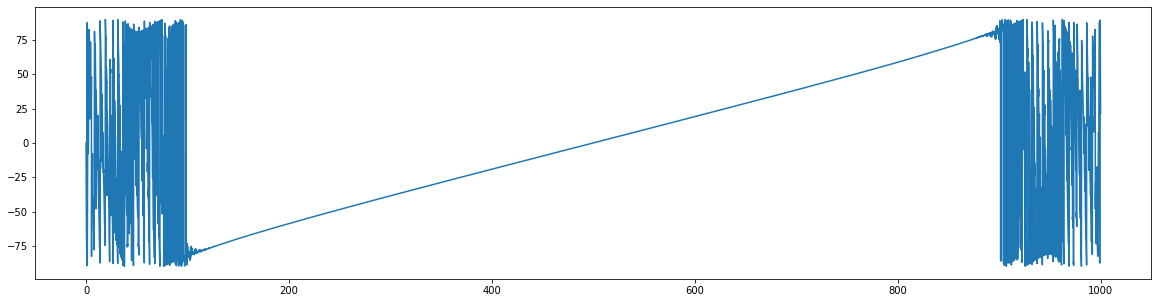

In [14]:
plt.figure(figsize = (20,5))
plt.plot(freq,phase)

In [15]:
f = 30
# omega = 2 * np.pi * f
if f in freq:
  print(freq.index(f))
print(mag[300])
print(phase[300])
mag_30Hz = 20 * np.log10(mag[300])
print(mag_30Hz)

300
2520.7662279266465
-41.82373688297548
68.03065143452046


**Question 2**
**The original speech signal is given as “science.wav”. The sampling rate is 32 Khz.
(a) Add 10 dB, 0 dB and -10 dB Gaussian noise to it. Plot the signals
(b) Perform Weiner filtering to eliminate the noise from the corrupted speech
signals. Evaluate the SNR value for the filtered speech signals.**


In [16]:
from IPython.display import Audio
wn = Audio('science.wav', autoplay=True)
display(wn)

In [17]:
# from pydub import AudioSegment
# wav_file = AudioSegment.from_file(file="science.wav", format="wav")

In [18]:
import librosa
signal, sr = librosa.load("science.wav")

In [19]:
signal
print(len(signal))

62200


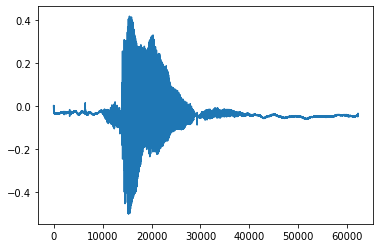

In [20]:
import matplotlib.pyplot as plt
plt.plot(signal)

In [21]:
# standard deviation of signal
sum2 = 0
for i in range(len(signal)):
  sum2 = sum2 + (signal[i] - np.mean(signal))**2
std_signal = np.sqrt(sum2 / len(signal))
std_signal

0.05289975832796236

In [22]:
np.std(signal)

0.052899756

In [23]:
sum1 = 0
for i in range(len(signal)):
  sum1 = sum1 + signal[i]
mean = sum1/len(signal)
mean

-0.04389583082567223

In [24]:
np.mean(signal)

-0.04389583

In [25]:
#10 db signal
std_noise10db = std_signal / np.power(10,0.5)

In [26]:
std_noise10db

0.01672837239888215

In [27]:
#10db gaussian noise
noise_10db = 0+std_noise10db * np.random.randn(len(signal))

In [28]:
print(len(noise_10db))

62200


In [29]:
noise10db_signal = noise_10db + signal

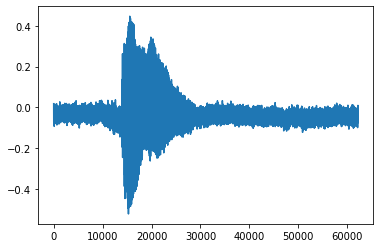

In [30]:
plt.plot(noise10db_signal)

In [31]:
#0db
std_noise0db = std_signal/np.power(10,0)

In [32]:
noise_0db = 0 + std_noise0db * (np.random.randn(len(signal)))

In [33]:
noise0db_signal = signal + noise_0db

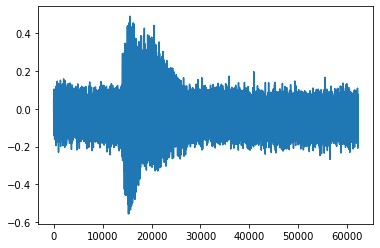

In [34]:
plt.plot(noise0db_signal)

In [35]:
#-10 db
std_noiseneg10db = std_signal/np.power(10,(-1)*0.5)

In [36]:
noise_neg10db = 0 + std_noiseneg10db * (np.random.randn(len(signal)))

In [37]:
noiseneg10db_signal = signal + noise_neg10db

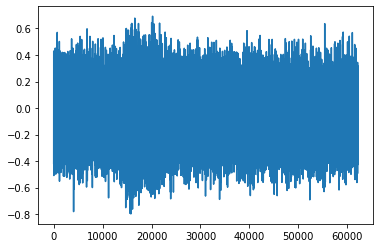

In [38]:
plt.plot(noiseneg10db_signal)

In [39]:
from scipy.signal import wiener
filtered_signal10db = wiener(noise10db_signal,mysize=200)

In [40]:
filtered_signal10db

array([-0.01613672, -0.01621215, -0.01641355, ..., -0.02287692,
       -0.02272741, -0.02247517])

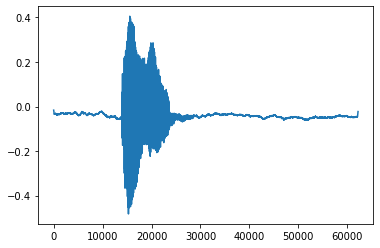

In [41]:
plt.plot(filtered_signal10db)

In [42]:

filtered_signal0db = wiener(noise0db_signal,mysize = 200)

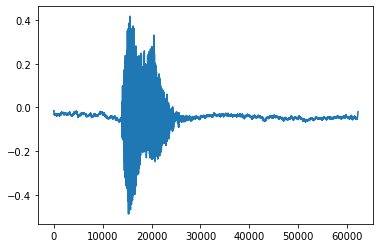

In [43]:
plt.plot(filtered_signal0db)

In [44]:
filtered_signalneg10db = wiener(noiseneg10db_signal,mysize = 200)

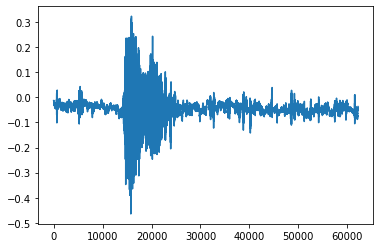

In [45]:
plt.plot(filtered_signalneg10db)

In [46]:
def mean(given_signal):
  sum = 0
  for i in range(len(given_signal)):
    sum = sum + given_signal[i]
  mean = sum/len(given_signal)
  return mean

In [47]:

def standarddeviation(given_signal,mean_given_signal):
  sum = 0
  for i in range(len(given_signal)):
    sum = sum + ((given_signal[i] - mean_given_signal)**2)
  variance = sum/len(given_signal)
  return np.sqrt(variance)

In [48]:
mean_signal = mean(signal)
mean_signal

-0.04389583082567223

In [49]:
std_signal = standarddeviation(signal,mean_signal)
std_signal

0.05289975795779584

In [50]:
snr_10db = 20 * np.log10(np.std(filtered_signal10db)/std_noise10db)
snr_10db

8.061342152675373

In [51]:
snr_0db = 20 * np.log10(np.std(filtered_signal0db)/std_noise0db)
snr_0db

-2.4158927021546006

In [52]:
snr_neg10db = 20 * np.log10(np.std(filtered_signalneg10db)/std_noiseneg10db)
snr_neg10db

-14.78634133897826